#**CHENNAI HOUSE PRICE PREDICTION**

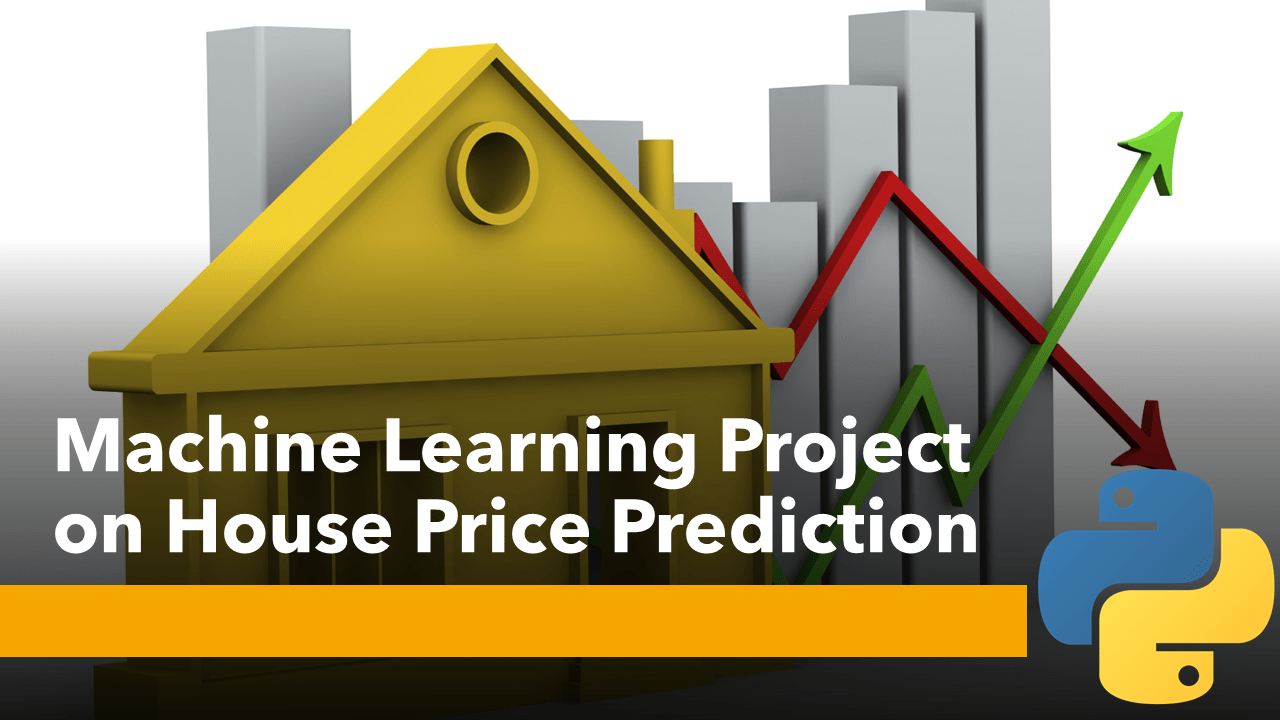

##**Problem Statement**
Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?


**Minimum Requirements**
It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.


In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

pd.pandas.set_option("display.max_columns", None)


**Load & Summarize Datasets**

In [2]:
dataset_url="https://raw.githubusercontent.com/Jaiprakash91194/Chennai_House_Price_Prediction/main/Chennai_House_Price_Datasets.csv"
df=pd.read_csv(dataset_url)
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


print number of rows and columns in dataset


In [3]:
print("The original dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

The original dataset has 7109 rows and 22 columns


**Check for Skewness of Target Variable**

0.7733433358864348


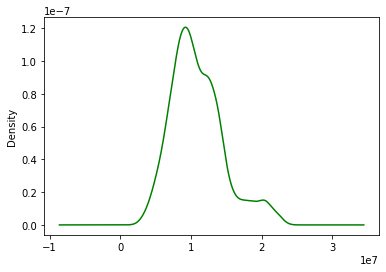

In [4]:
print(df["SALES_PRICE"].skew())
df["SALES_PRICE"].plot.density(color="green")
plt.show()

From above Graph, we see that the target variable is not skewed. In case if the target features are skewed, we need to perform transformation to handle skewed data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [6]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [7]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
INT_SQFT,7109.0,1.382073e+03,4.574109e+02,500.0,993.00,1373.0,1744.00,2500.00
DIST_MAINROAD,7109.0,9.960318e+01,5.740311e+01,0.0,50.00,99.0,148.00,200.00
N_BEDROOM,7108.0,1.637029e+00,8.029016e-01,1.0,1.00,1.0,2.00,4.00
N_BATHROOM,7104.0,1.213260e+00,4.096387e-01,1.0,1.00,1.0,1.00,2.00
N_ROOM,7109.0,3.688704e+00,1.019099e+00,2.0,3.00,4.0,4.00,6.00
QS_ROOMS,7109.0,3.517471e+00,8.919724e-01,2.0,2.70,3.5,4.30,5.00
QS_BATHROOM,7109.0,3.507244e+00,8.978337e-01,2.0,2.70,3.5,4.30,5.00
QS_BEDROOM,7109.0,3.485300e+00,8.872664e-01,2.0,2.70,3.5,4.30,5.00
QS_OVERALL,7061.0,3.503254e+00,5.272229e-01,2.0,3.13,3.5,3.89,4.97
REG_FEE,7109.0,3.769383e+05,1.430707e+05,71177.0,272406.00,349486.0,451562.00,983922.00


In [8]:
df.describe(include=object).T

,count,unique,top,freq
PRT_ID,7109,7109,P03210,1
AREA,7109,17,Chrompet,1681
DATE_SALE,7109,2798,06-10-2009,12
SALE_COND,7109,9,AdjLand,1433
PARK_FACIL,7109,3,Yes,3587
DATE_BUILD,7109,5808,02-07-1987,6
BUILDTYPE,7109,5,House,2444
UTILITY_AVAIL,7109,5,AllPub,1886
STREET,7109,5,Paved,2560
MZZONE,7109,6,RL,1858


##**1. Null Values**
Finding how many Null Value in Dataset-Column wise.


In [9]:
null_values=df.isnull().sum()
null_values={"Null_values":null_values}
pd.DataFrame(null_values).T


,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
Null_values,0,0,0,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,48,0,0,0


Finding Percentage Of Null Value In Dataset-Column wise.


In [10]:
percent_missing = (df.isnull().sum() * 100 / len(df)).round(3)
percent_missing={"Percent_missing":percent_missing}
pd.DataFrame(percent_missing).T

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
Percent_missing,0.0,0.0,0.0,0.0,0.0,0.014,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.675,0.0,0.0,0.0


Since the % of null values is very less in the datasets, lets drop the rows with null values

In [11]:
df.dropna(axis=0,inplace=True)

In [12]:
# Printing the number of Rows and Columns in Dataset.
print("The dataset has {} rows and {} columns after removing null values".format(df.shape[0], df.shape[1]))

The dataset has 7056 rows and 22 columns after removing null values


##**2. Duplicate values**

In [13]:
# Finding the Dataset has Duplicated Values or Not.
df.duplicated().sum()

0

##**3. Dropping Unwanted Features**-Features that does not make sense 



In [14]:
# Printing all the Features in Dataset.
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

Printing all the Numerical Features in Dataset.


In [15]:
numerical_features = df.select_dtypes(exclude="object").columns
numerical_features

Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE',
       'COMMIS', 'SALES_PRICE'],
      dtype='object')

In [16]:
# Printing all the Categorical Features in Dataset.
categorical_features = df.select_dtypes(include="object").columns
categorical_features

Index(['PRT_ID', 'AREA', 'DATE_SALE', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE'],
      dtype='object')

The below features are dropped:
- PRT_ID --> Unique value which might lead to Overfitting of data. 
- REG_FEE, COMMIS --> These are calculated based on the selling price of the property(Target Variable). So can't expect users to give the Registration fees and Commission.

In [17]:
# Dropping the Unwanted Features.
df=df.drop(["PRT_ID","REG_FEE","COMMIS"],axis=1)

# Printing number of Rows and Columns in Dataset.
print("The dataset has {} rows and {} columns after dropping unwantes features".format(df.shape[0], df.shape[1]))

The dataset has 7056 rows and 19 columns after dropping unwantes features


##**4. Add a features**





In [18]:
# Converting a data type of date column from "Object" to "Date"
df["DATE_SALE"]=pd.to_datetime(df["DATE_SALE"])
df["DATE_BUILD"]=pd.to_datetime(df["DATE_BUILD"])

# Finding a year of Built and Sale
df["YEAR_OF_SALE"]=df["DATE_SALE"].dt.year
df["YEAR_OF_BUILD"]=df["DATE_BUILD"].dt.year


In [19]:
# Computing the Age of Buildings.
df["AGE_AT_SOLD"]=df["YEAR_OF_SALE"]-df["YEAR_OF_BUILD"]

In [20]:
df.head(5)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YEAR_OF_SALE,YEAR_OF_BUILD,AGE_AT_SOLD
0,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,2011,1967,44
1,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,2006,1995,11
2,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,2012,1992,20
3,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,2010,1988,22
4,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,2009,1979,30


In [21]:
# Dropping the Unwanted Features.
df=df.drop(["DATE_SALE","DATE_BUILD"],axis=1)

In [22]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YEAR_OF_SALE,YEAR_OF_BUILD,AGE_AT_SOLD
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,2011,1967,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,2006,1995,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,2012,1992,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,2010,1988,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,2009,1979,30


##**5. Spelling corrections in each column**


In [23]:
for i in df.columns:
  print(i, end=",")

AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YEAR_OF_SALE,YEAR_OF_BUILD,AGE_AT_SOLD,

###**5.1 Area**

In [24]:
# Unique Values in feature's before cleaning.
print("The number of area's before analysing and cleaning:",len(df["AREA"].unique()))
print("------------------------------------------------------")
df["AREA"].unique()

The number of area's before analysing and cleaning: 17
------------------------------------------------------


array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [25]:
# Replacing all the incorrect spelling to a correct spelling.
df["AREA"].replace(["Karapakam","Ana Nagar","Ann Nagar","Adyr","Velchery","Chrompt","Chrmpet","Chormpet","KKNagar","TNagar"],["Karapakkam","Anna Nagar","Anna Nagar","Adyar","Velachery","Chrompet","Chrompet","Chrompet","KK Nagar","T Nagar"],inplace=True)

In [26]:
# Unique Values in feature's after cleaning.
print("The number of area's before analysing and cleaning:",len(df["AREA"].unique()))
print("------------------------------------------------------")
df["AREA"].unique()

The number of area's before analysing and cleaning: 7
------------------------------------------------------


array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

###**5.2 Sales Condition**

In [27]:
# Unique Values in feature's before cleaning.
print("The number of Sales condition before analysing and cleaning:",len(df["SALE_COND"].unique()))
print("---------------------------------------------------------------")
df["SALE_COND"].unique()

The number of Sales condition before analysing and cleaning: 9
---------------------------------------------------------------


array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [28]:
# Replacing all the incorrect spelling to a correct spelling.
df["SALE_COND"].replace(["Ab Normal","Partiall","PartiaLl","AdjLand"],["AbNormal","Partial","Partial","Adj Land"],inplace=True)

In [29]:
# Unique Values in feature's after cleaning.
print("The number of Sales condition after analysing and cleaning:",len(df["SALE_COND"].unique()))
print("--------------------------------------------------------------")
df["SALE_COND"].unique()

The number of Sales condition after analysing and cleaning: 5
--------------------------------------------------------------


array(['AbNormal', 'Family', 'Partial', 'Adj Land', 'Normal Sale'],
      dtype=object)

###**5.3 Parking Facility**

In [30]:
# Unique Values in feature's before cleaning.
print("The number of Parking facilities before analysing and cleaning:",len(df["PARK_FACIL"].unique()))
print("------------------------------------------------------------------")
df["PARK_FACIL"].unique()

The number of Parking facilities before analysing and cleaning: 3
------------------------------------------------------------------


array(['Yes', 'No', 'Noo'], dtype=object)

In [31]:
# Replacing all the incorrect spelling to a correct spelling.
df["PARK_FACIL"].replace(["Noo"],["No"],inplace=True)

In [32]:
# Unique Values in feature's after cleaning.
print("The number of Parking facilities before analysing and cleaning:",len(df["PARK_FACIL"].unique()))
print("------------------------------------------------------------------")
df["PARK_FACIL"].unique()

The number of Parking facilities before analysing and cleaning: 2
------------------------------------------------------------------


array(['Yes', 'No'], dtype=object)

###**5.4 Build Type**

In [33]:
# Unique Values in feature's before cleaning.
print("The number of Building types before analysing and cleaning:",len(df["BUILDTYPE"].unique()))
print("--------------------------------------------------------------")
df["BUILDTYPE"].unique()

The number of Building types before analysing and cleaning: 5
--------------------------------------------------------------


array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [34]:
# Replacing all the incorrect spelling to a correct spelling.
df["BUILDTYPE"].replace(["Comercial","Other"],["Commercial","Others"],inplace=True)

In [35]:
# Unique Values in feature's after cleaning.
print("The number of Building types after analysing and cleaning:",len(df["BUILDTYPE"].unique()))
print("-------------------------------------------------------------")
df["BUILDTYPE"].unique()

The number of Building types after analysing and cleaning: 3
-------------------------------------------------------------


array(['Commercial', 'Others', 'House'], dtype=object)

###**5.5 Utility Available**

In [36]:
# Unique Values in feature's before cleaning.
print("The number of Utility available before analysing and cleaning:",len(df["UTILITY_AVAIL"].unique()))
print("-----------------------------------------------------------------")
df["UTILITY_AVAIL"].unique()

The number of Utility available before analysing and cleaning: 5
-----------------------------------------------------------------


array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [37]:
# Replacing all the incorrect spelling to a correct spelling.
df["UTILITY_AVAIL"].replace(["NoSewr ","NoSeWa","All Pub"],["No Sewer","No Sewer","AllPub"],inplace=True)

In [38]:
# Unique Values in feature's after cleaning.
print("The number of Utility available after analysing and cleaning:",len(df["UTILITY_AVAIL"].unique()))
print("----------------------------------------------------------------")
df["UTILITY_AVAIL"].unique()

The number of Utility available after analysing and cleaning: 3
----------------------------------------------------------------


array(['AllPub', 'ELO', 'No Sewer'], dtype=object)

###**5.6 Street**

In [39]:
# Unique Values in feature's before cleaning.
print("The number of street before analysing and cleaning:",len(df["STREET"].unique()))
print("------------------------------------------------------")
df["STREET"].unique()

The number of street before analysing and cleaning: 5
------------------------------------------------------


array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [40]:
# Replacing all the incorrect spelling to a correct spelling.
df["STREET"].replace(["Pavd","NoAccess"],["Paved","No Access"],inplace=True)

In [41]:
# Unique Values in feature's after cleaning.
print("The number of street after analysing and cleaning:",len(df["STREET"].unique()))
print("-----------------------------------------------------")
df["STREET"].unique()

The number of street after analysing and cleaning: 3
-----------------------------------------------------


array(['Paved', 'Gravel', 'No Access'], dtype=object)

###**5.7 MZ ZONE**

In [42]:
# Checking the Unique Values in MZ Zone.
print("The number of MZ Zone :",len(df["MZZONE"].unique()))
print("------------------------------------------------------")
df["MZZONE"].unique()

The number of MZ Zone : 6
------------------------------------------------------


array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

##**6.Exploartory Data Analysis**

###**6.1 Categorical features**

####**6.1.1 Area**

In [43]:
def feature_vs_target(feature, target):

  feature_data=df[feature].value_counts(ascending=False)
  feature_data_min=df.groupby(feature)[target].min()
  feature_data_mean=df.groupby(feature)[target].mean()
  feature_data_max=df.groupby(feature)[target].max()
  plt.figure(figsize=(15,12))

  plt.subplot(221)
  sns.barplot(x=feature_data.index,y=feature_data.values,data=df)
  title1 = "Distribution  of " + feature
  plt.xticks(rotation=60)
  plt.title(title1)

  plt.subplot(222)
  sns.barplot(x=feature,y=target,data=df,order=df.groupby(feature)[target].mean().reset_index().sort_values(target)[feature])
  title2 = feature + " vs AVG Sale Price"
  plt.xticks(rotation=60)
  plt.title(title2) 
  
  plt.subplot(223)
  sns.barplot(x=feature_data_min.index,y=feature_data_min.values,data=df,order=df.groupby(feature)[target].min().reset_index().sort_values(target)[feature]) 
  title3 = feature + " vs MIN. SALES PRICE"
  plt.xticks(rotation=60)
  plt.title(title3)


  plt.subplot(224)
  sns.barplot(x=feature_data_min.index,y=feature_data_min.values,data=df,order=df.groupby(feature)[target].max().reset_index().sort_values(target)[feature]) 
  title4 = feature + " vs MAX. SALES PRICE"
  plt.xticks(rotation=90)
  plt.title(title4)

  plt.tight_layout()
  plt.show()

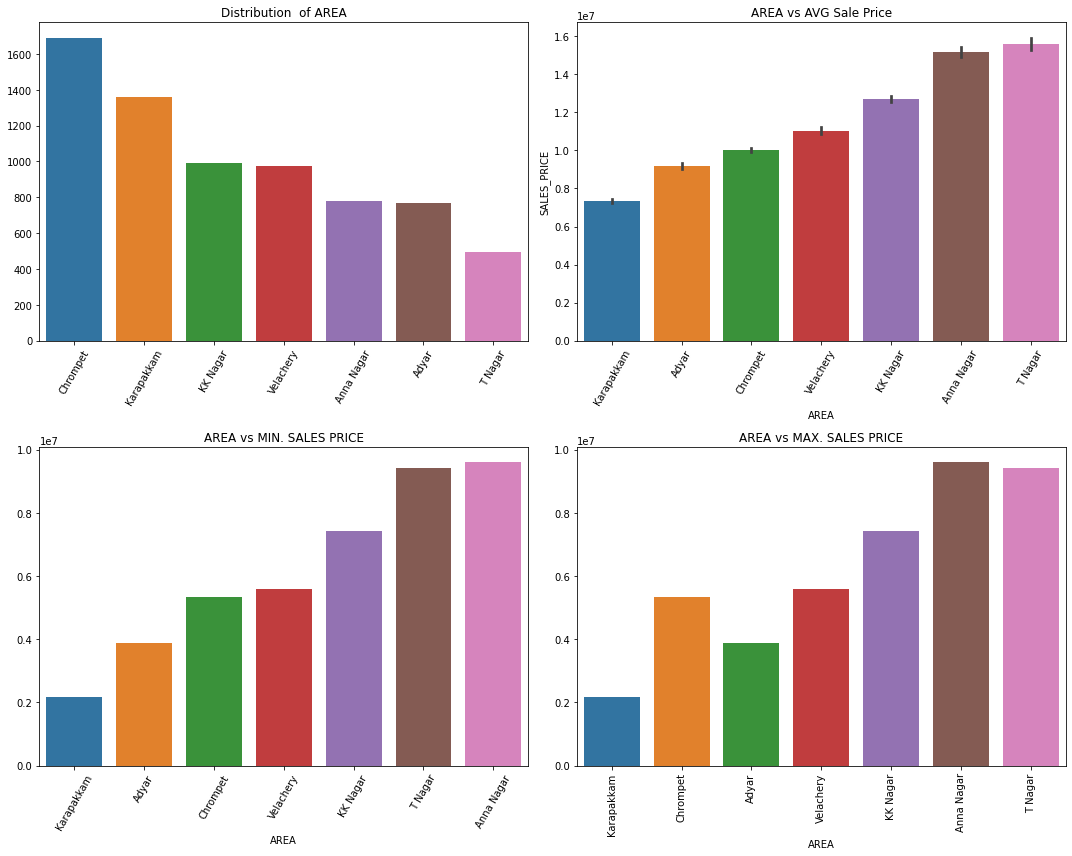

In [44]:
feature_vs_target("AREA", "SALES_PRICE")

**Interpretation:**
                

1.    Plot 2 shows a linear trend between Area and Average sales price. 
2.   Linearity shows that, It is a ordinal categorical variable, so I can try to exploit the linear ordering by using label encoding to encode this feature.  



####**6.1.2 Sales Condition**

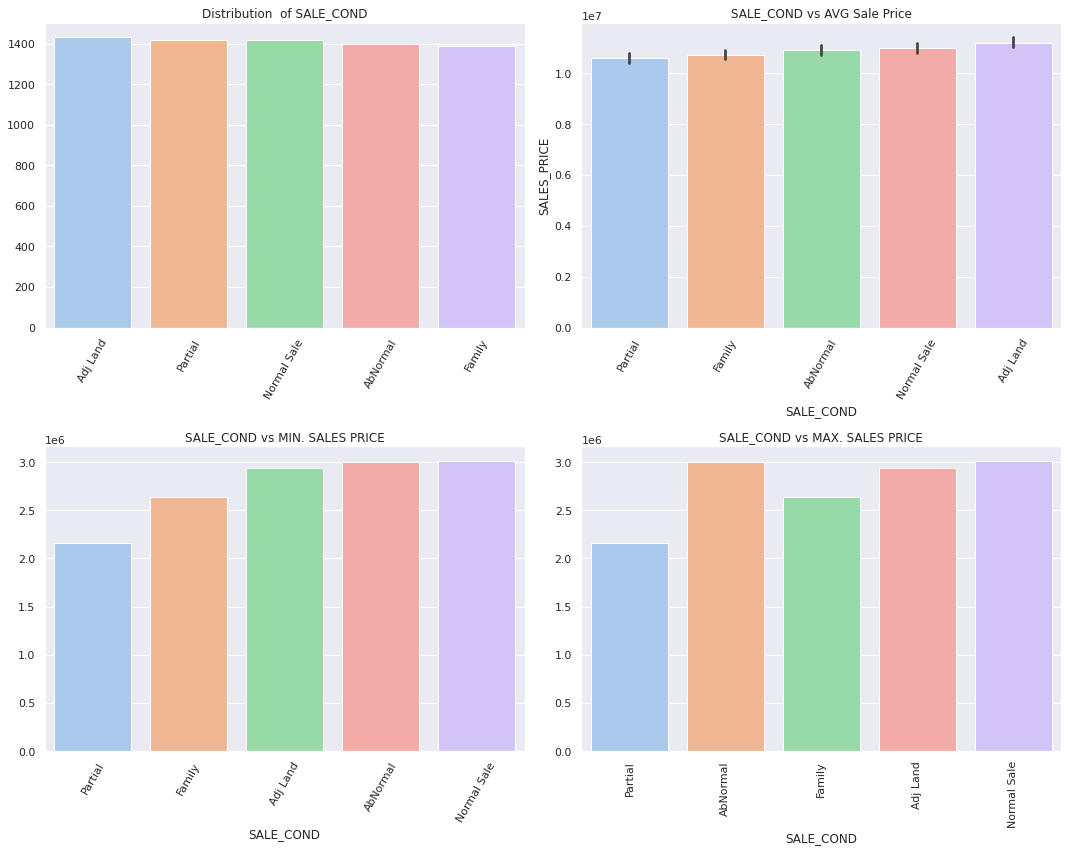

In [45]:
sns.set_theme(style="darkgrid",palette="pastel")
feature_vs_target("SALE_COND", "SALES_PRICE")

**Interpretation:**
                

1.    Plot 2 shows a linear trend between Sales condition and Average sales price. 
2.   Linearity shows, It is an ordinal categorical variable, so I can try to exploit the linear ordering by using label encoding to encode this feature.  


####**6.1.3 Parking Facility**





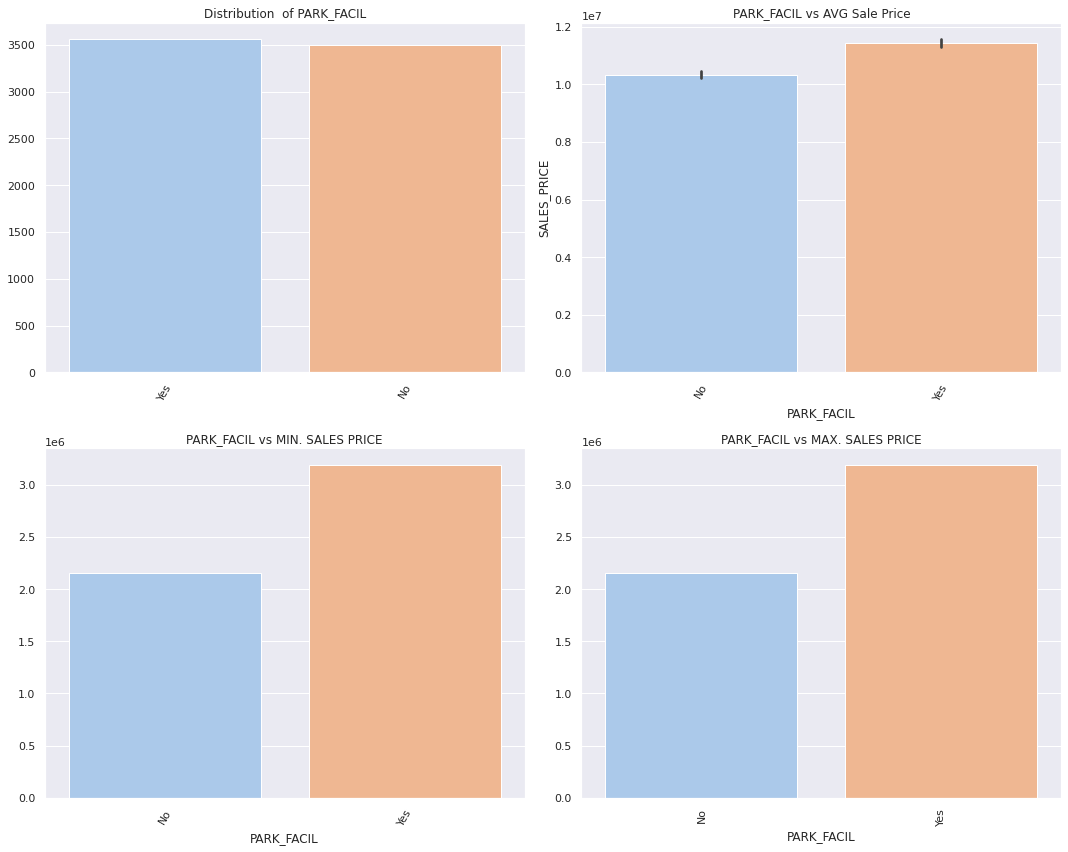

In [46]:
feature_vs_target("PARK_FACIL", "SALES_PRICE")

**Interpretation:**
                

1.    Plot 2 shows a linear trend between Parking facility and Average sales price. 
2.   Linearity shows, It is an ordinal categorical variable, so I can try to exploit the linear ordering by using label encoding to encode this feature.  


####**6.1.4 Build type**

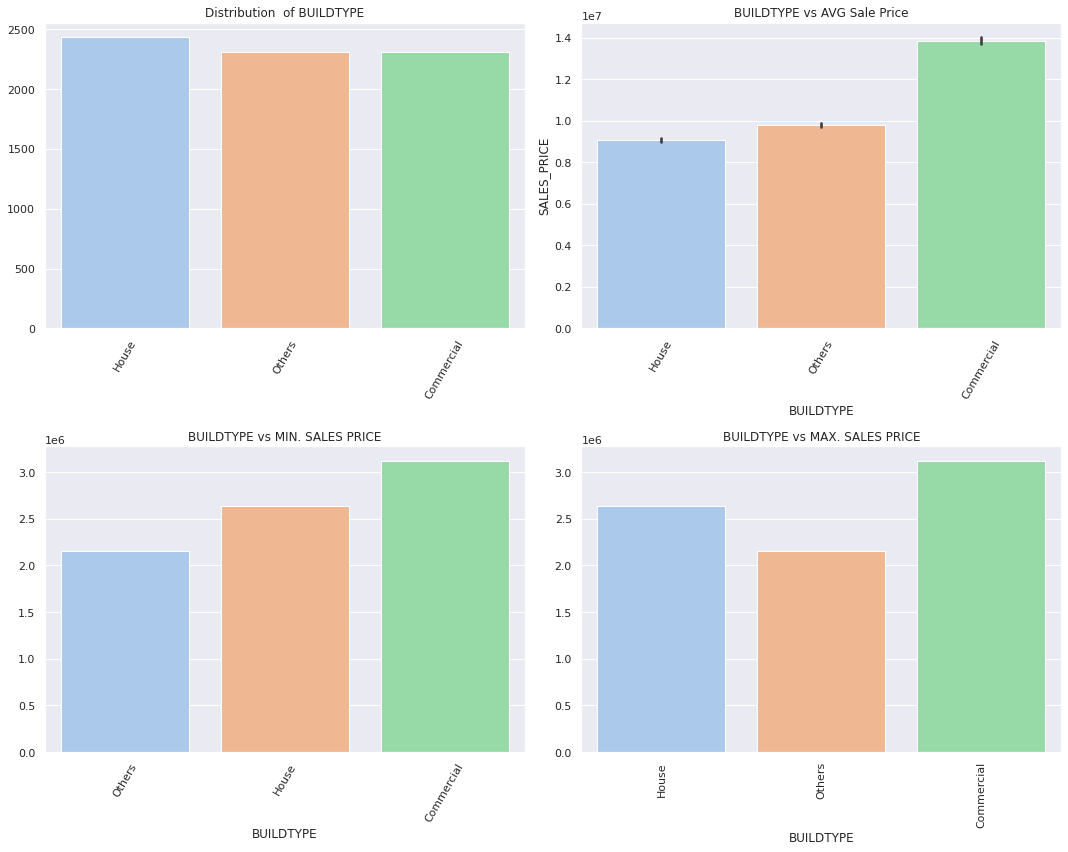

In [47]:
feature_vs_target("BUILDTYPE", "SALES_PRICE")

**Interpretation:**
                

1.    Plot 2 shows a there is no linear trend between Build type and Average sales price. 
2.   Non-Linearity shows,It is an Nominal categorical variable, so I can use one_hotencoding to encode this feature.  


####**6.1.5 Utility Available**

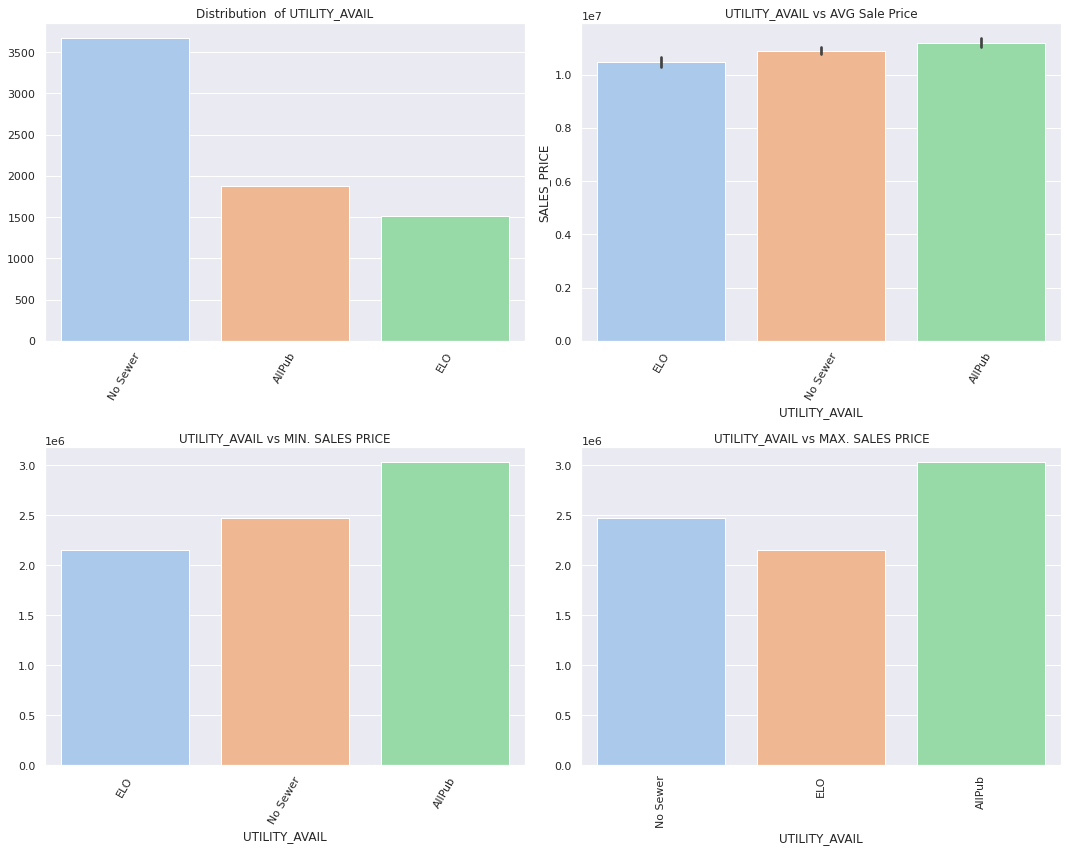

In [48]:
feature_vs_target("UTILITY_AVAIL", "SALES_PRICE")

**Interpretation:**
                

1.    Plot 2 shows a linear trend between Utility available and Average sales price. 
2.   Linearity shows, It is an ordinal categorical variable, so I can try to exploit the linear ordering by using label encoding to encode this feature.  


####**6.1.6 Street**



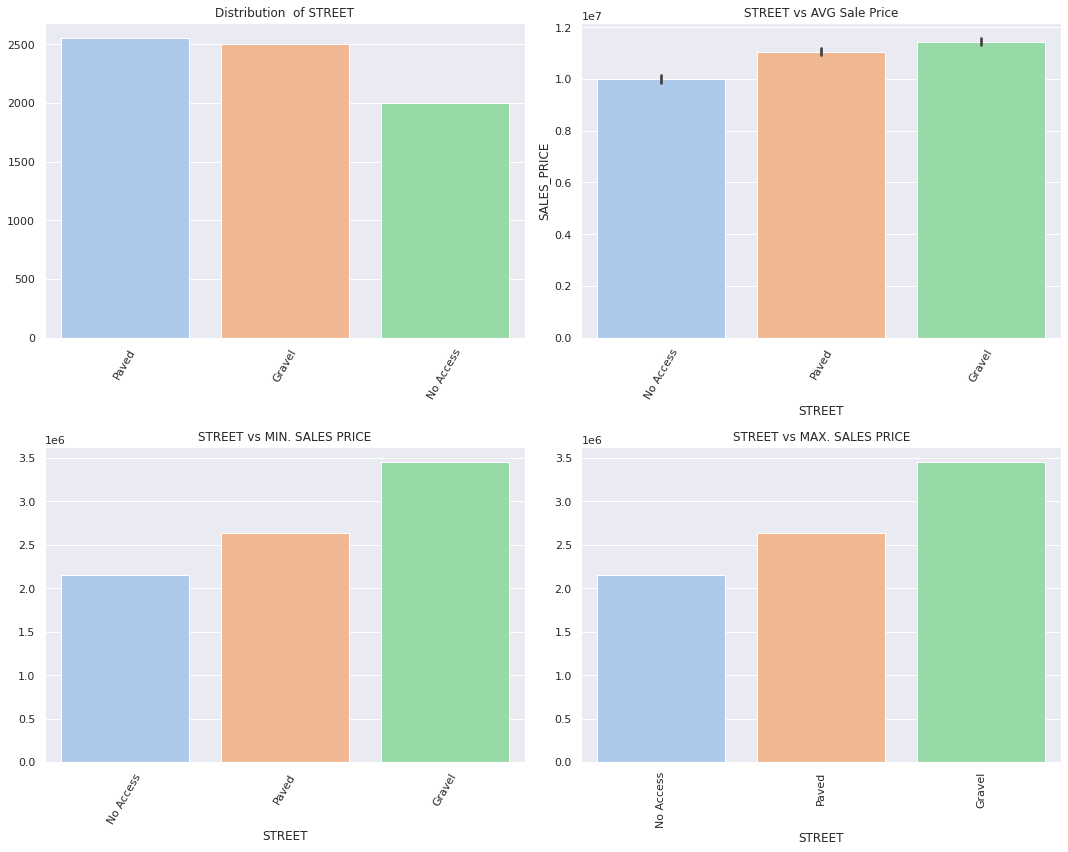

In [49]:
feature_vs_target("STREET", "SALES_PRICE")

**Interpretation:**
                

1.    Plot 2 shows a linear trend between Street and Average sales price. 
2.   Linearity shows, It is an ordinal categorical variable, so I can try to exploit the linear ordering by using label encoding to encode this feature.  

####**6.1.7 MZ ZONE**

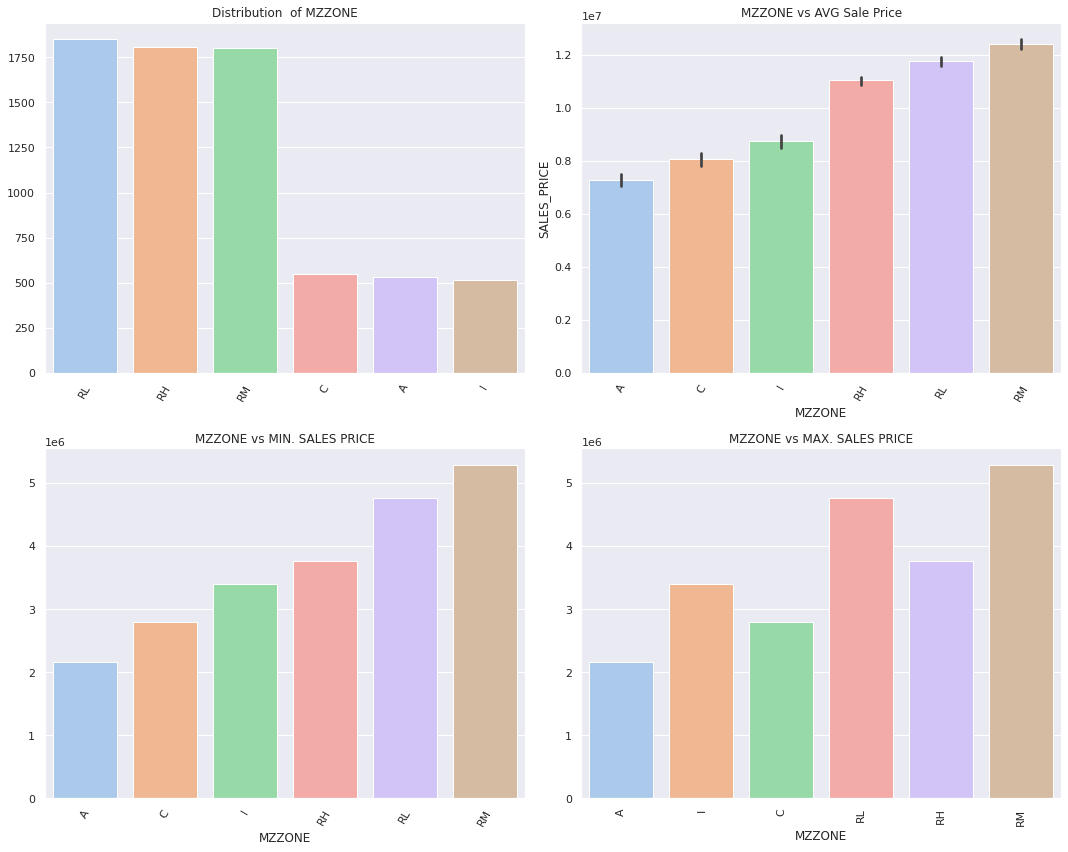

In [50]:
feature_vs_target("MZZONE", "SALES_PRICE")

**Interpretation:**
                

1.    Plot 2 shows a linear trend between MZ Zone and Average sales price. 
2.   Linearity shows, It is an ordinal categorical variable, so I can try to exploit the linear ordering by using label encoding to encode this feature.  

####**6.1.8 Year of Build**

In [51]:
# EDA on Feature-Year of Build
build=df['YEAR_OF_BUILD'].value_counts()

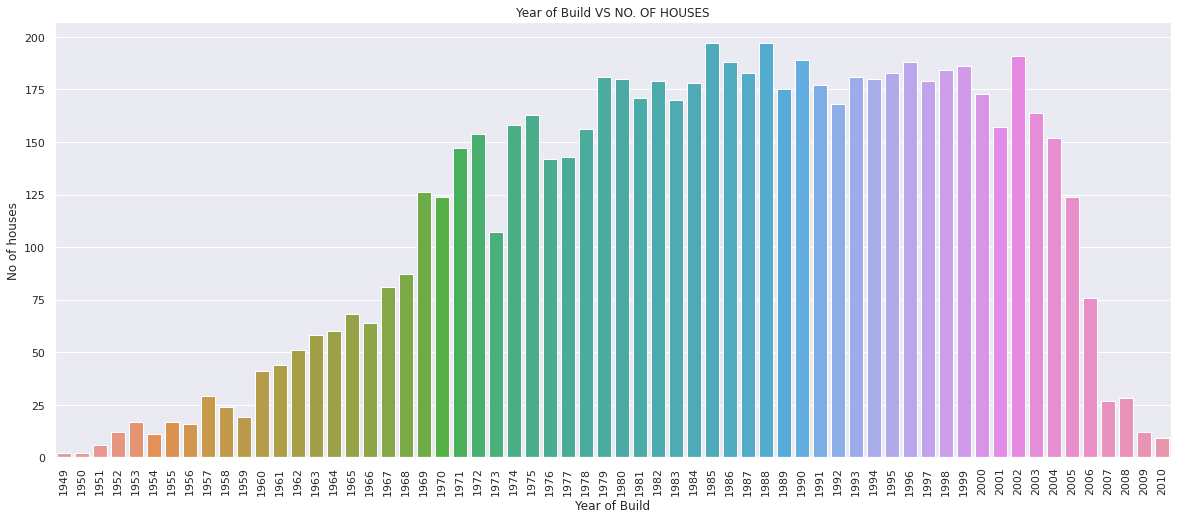

In [52]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(20,8))


sns.barplot(x=build.index,y=build.values,data=df)
plt.xticks(rotation=90)
plt.xlabel("Year of Build")
plt.ylabel("No of houses")
plt.title('Year of Build VS NO. OF HOUSES')
plt.show()

####**6.1.9 Year of Sold**

In [53]:
# EDA on Feature-Year of Sold
sold=df['YEAR_OF_SALE'].value_counts()

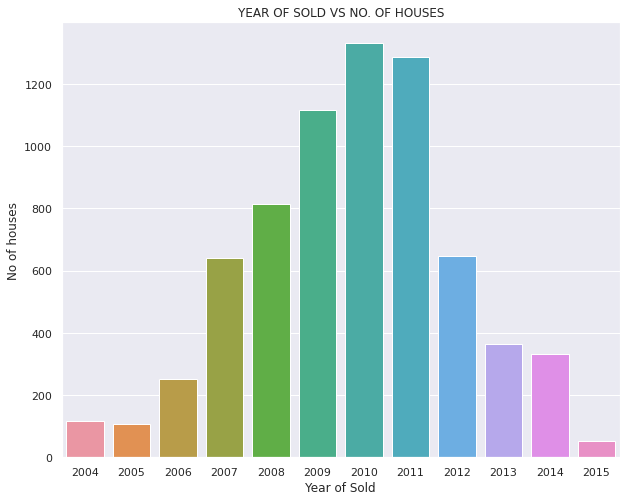

In [54]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(10,8))


sns.barplot(x=sold.index,y=sold.values,data=df)
plt.xticks(rotation=0)
plt.xlabel("Year of Sold")
plt.ylabel("No of houses")
plt.title('YEAR OF SOLD VS NO. OF HOUSES')
plt.show()

###**6.2 Numerical features**

In [55]:
quantitative_features = []
for feature in df.columns:
  if len(df[feature].unique()) > 25: 
    quantitative_features.append(feature)
quantitative_features.remove("SALES_PRICE")

In [56]:
quantitative_features

['INT_SQFT',
 'DIST_MAINROAD',
 'QS_ROOMS',
 'QS_BATHROOM',
 'QS_BEDROOM',
 'QS_OVERALL',
 'YEAR_OF_BUILD',
 'AGE_AT_SOLD']

**Check and Handle Outliers**

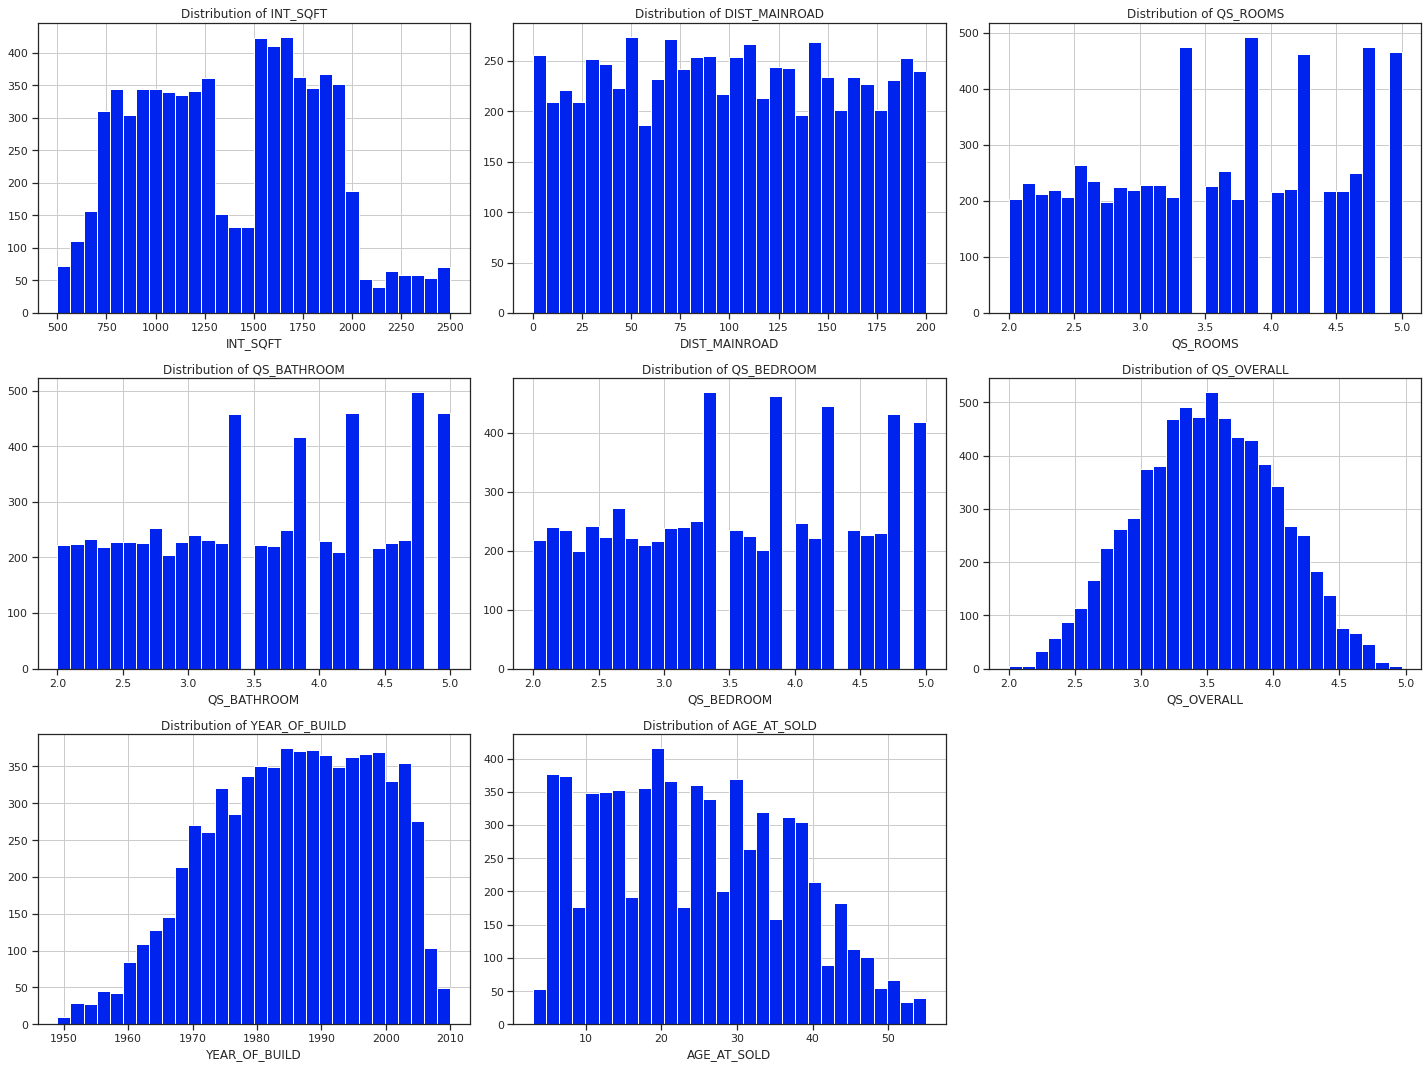

In [57]:
sns.set_theme(style='ticks',palette="winter")
i = 330
plt.figure(figsize=(20,15))
for feature in quantitative_features:
  i += 1
  plt.subplot(i)
  df[feature].hist(bins=30)
  title1="Distribution of " + feature
  plt.xlabel(feature)
  plt.title(title1)

plt.tight_layout()
plt.show()

In [58]:
sns.set_theme(style='whitegrid',palette='winter')

def plot_graph(dataframe, dataframe1, feature):
  plt.figure(figsize=(15,6))
  plt.subplot(121)
  sns.distplot(dataframe[feature])
  plt.title("Distribution of feature with Outlier")
  plt.subplot(122)
  sns.distplot(dataframe1[feature])
  plt.title("Distribution of feature after removing outliers")

def handle_outlier(feature):
  data = df.copy()
  IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
  lower_fence = df[feature].quantile(0.25) - 1.5*IQR
  upper_fence = df[feature].quantile(0.75) + 1.5*IQR
  data.loc[data[feature] > upper_fence, feature] = int(upper_fence)
  plot_graph(df, data, feature)
  plt.tight_layout()
  plt.show()
  df[feature] = data[feature]

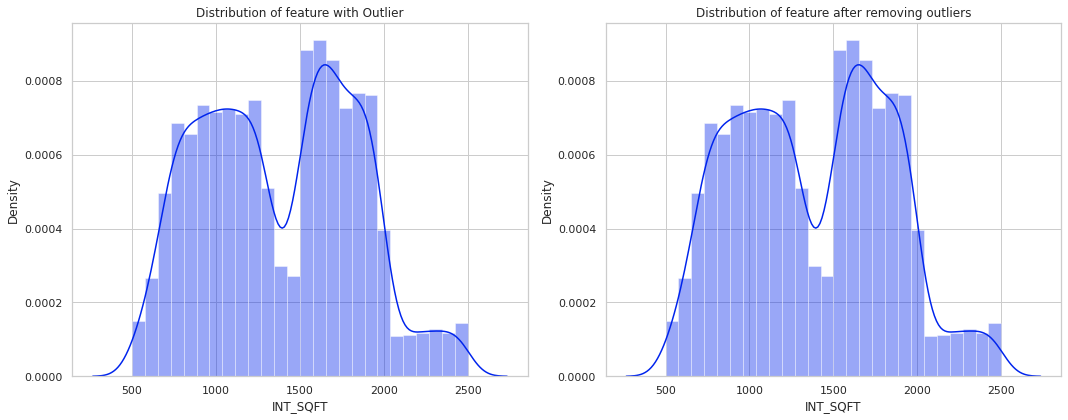

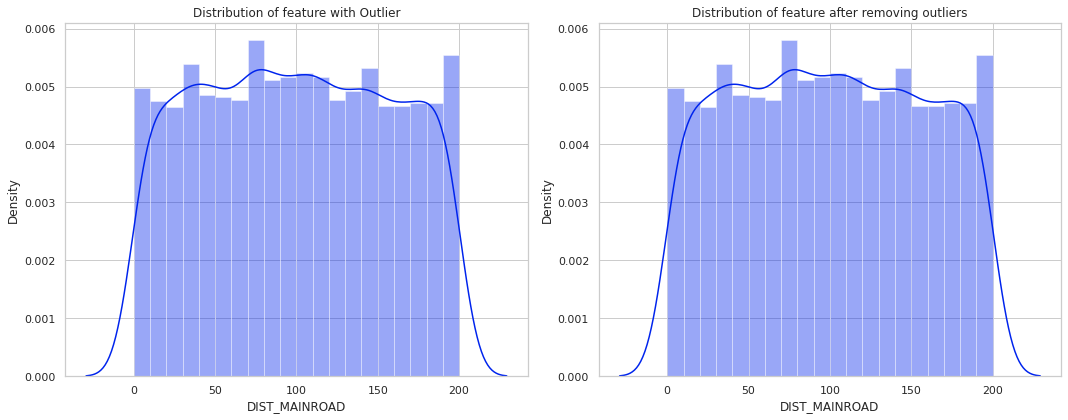

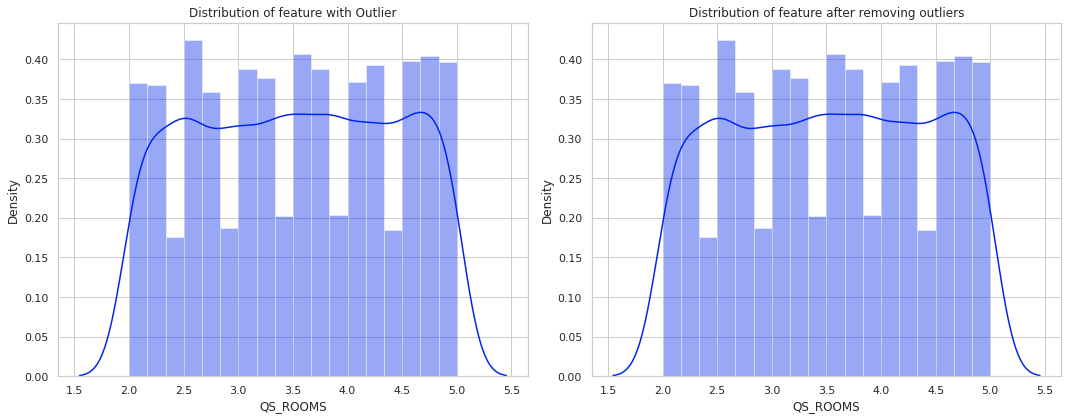

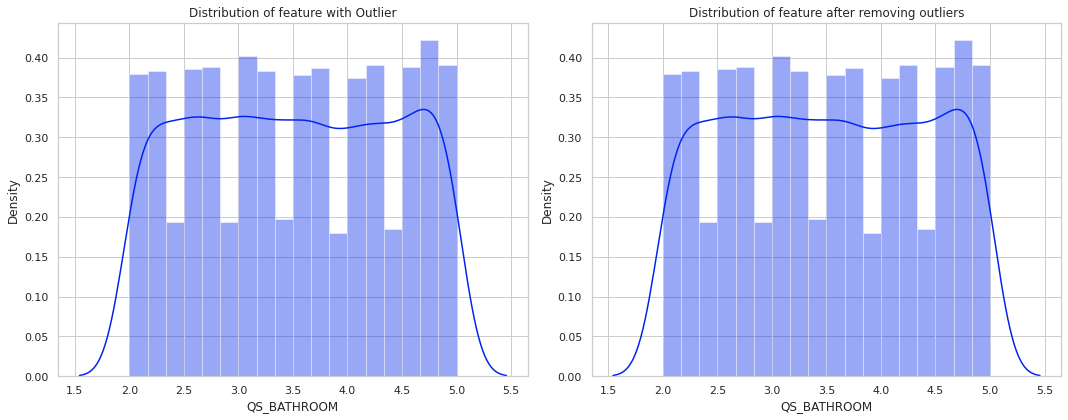

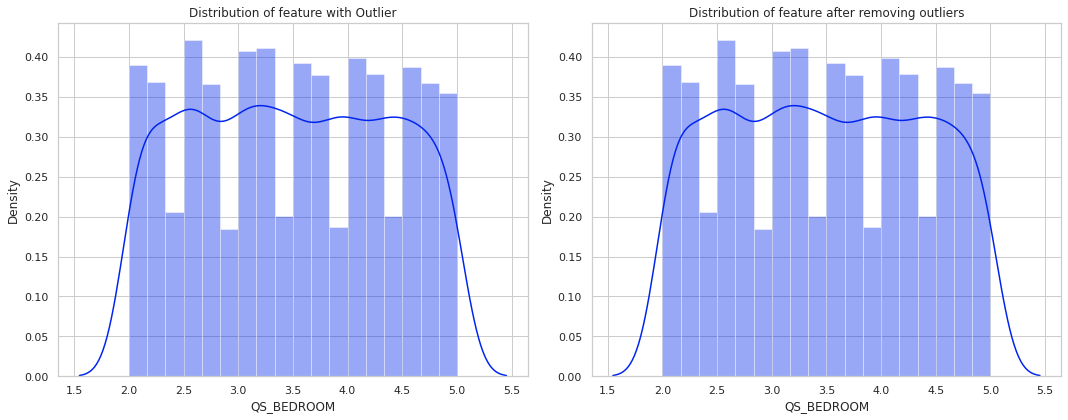

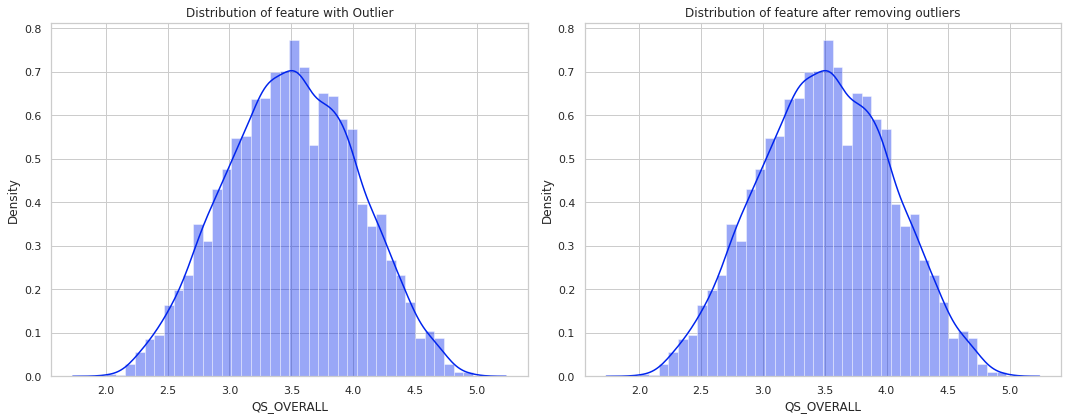

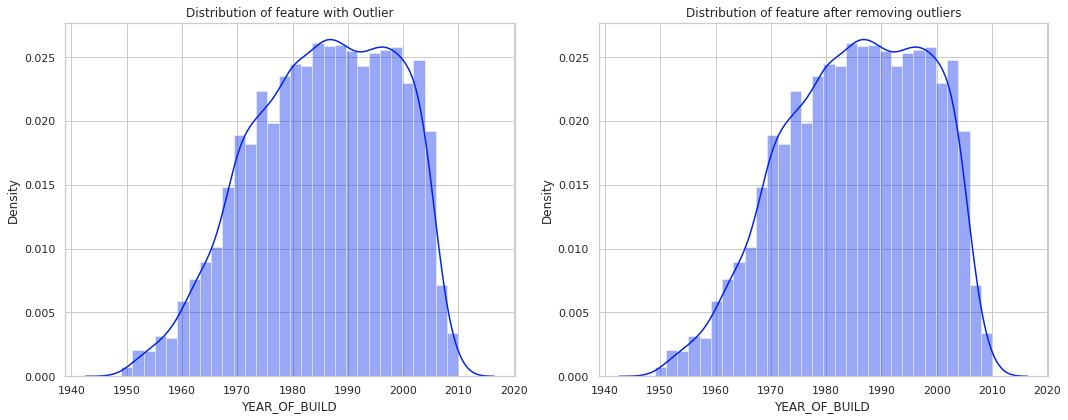

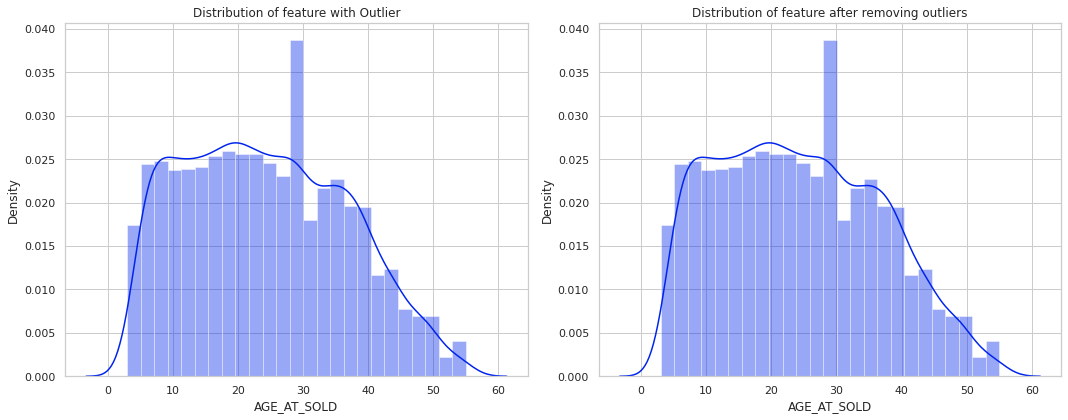

In [59]:
for feature in quantitative_features:
  handle_outlier(feature)

**Scatter Plot**

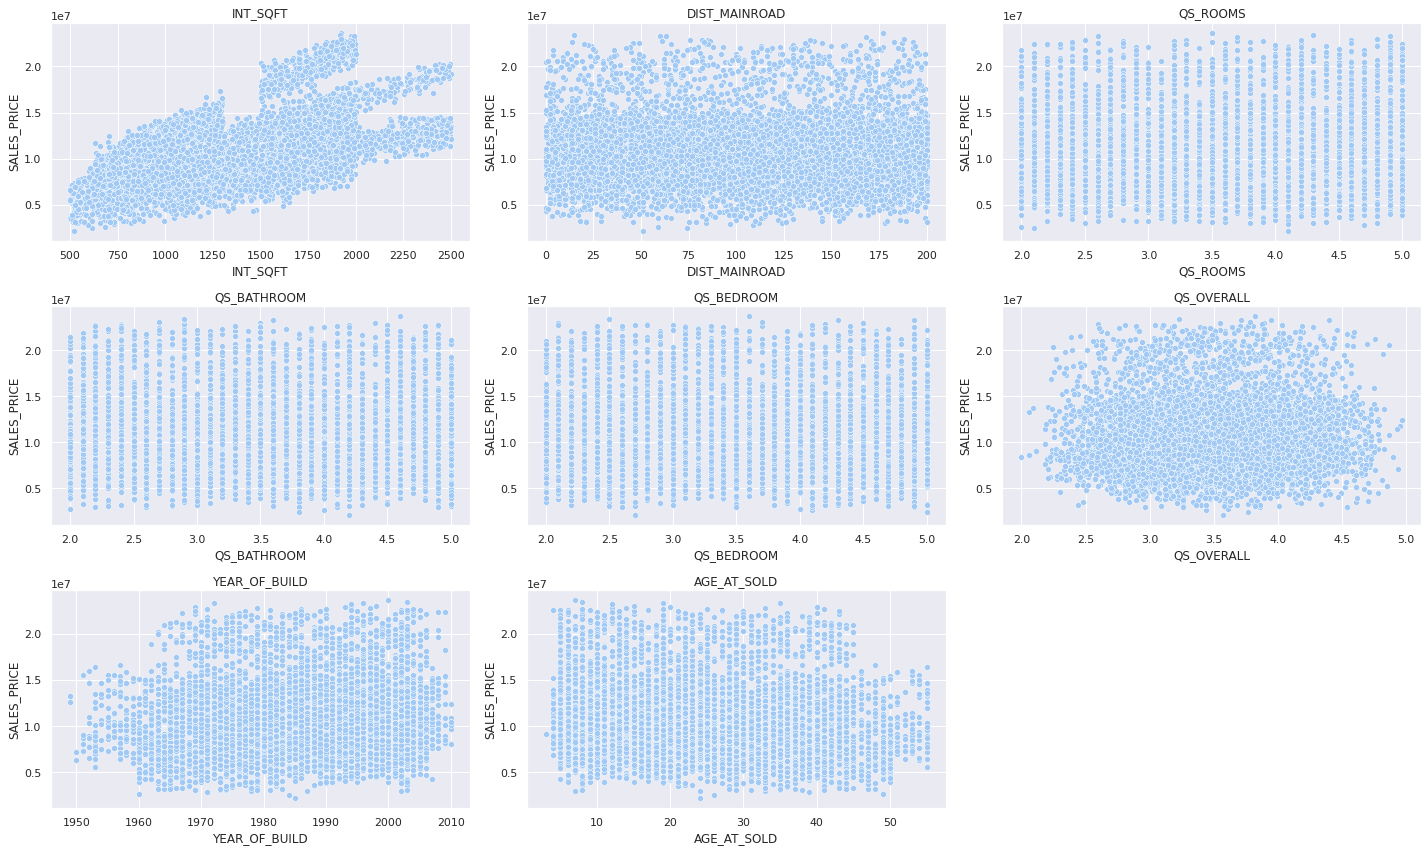

In [60]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(20, 12))
i = 330
for feature in quantitative_features:
  i += 1
  plt.subplot(i)
  sns.scatterplot(df[feature],df['SALES_PRICE'])
  title1 = feature + "vs SALES_PRICE"
  plt.title(feature)
  
plt.tight_layout()
plt.show()

**Regression Plot**

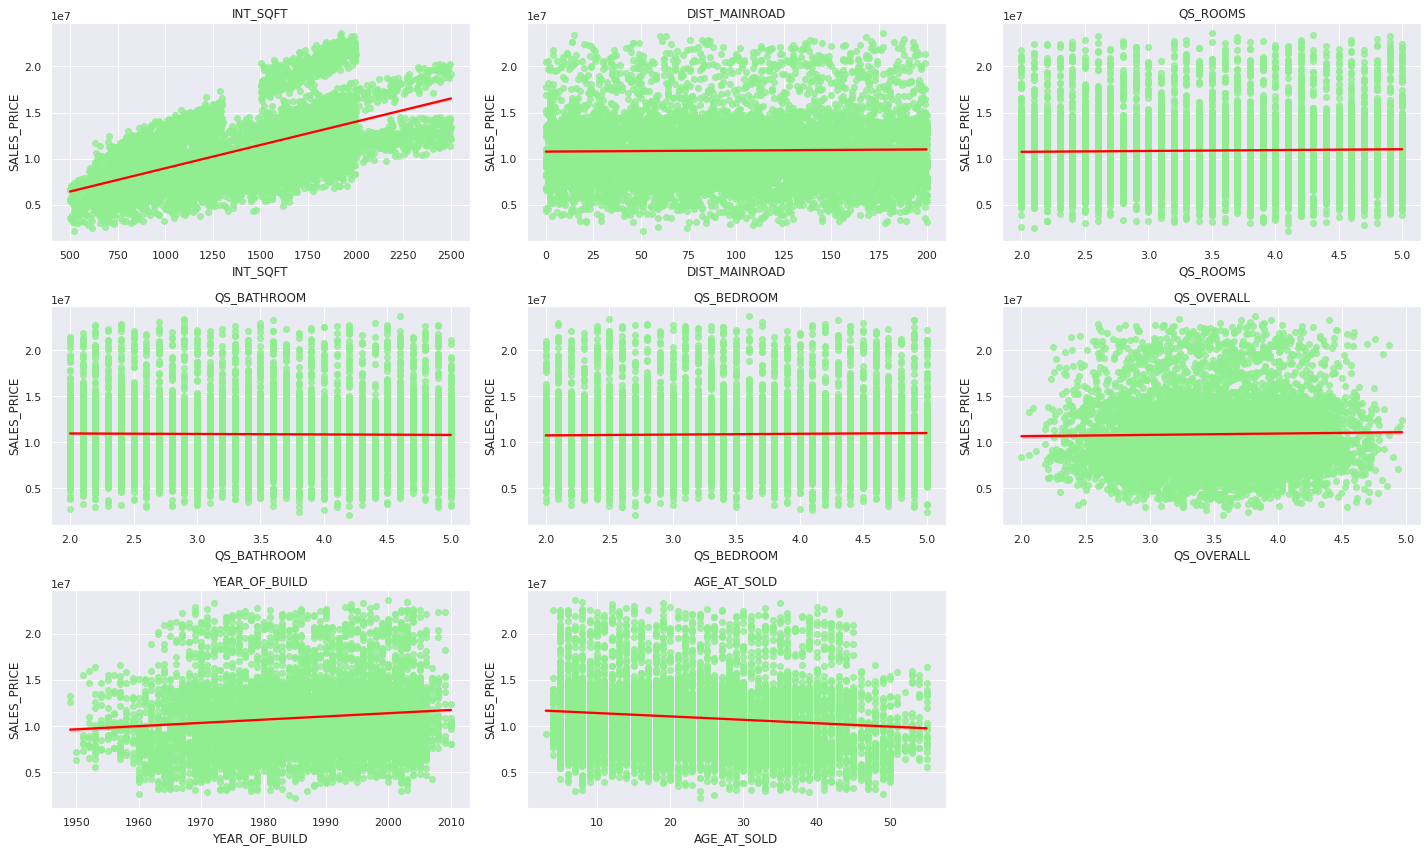

In [61]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(20, 12))
i = 330
for feature in quantitative_features:
  i += 1
  plt.subplot(i)
  sns.regplot(x=feature, y='SALES_PRICE', data=df, scatter_kws={"color": "lightgreen"}, line_kws={"color": "red"})
  title1 = feature + "vs SALES_PRICE"
  plt.title(feature)
  
plt.tight_layout()
plt.show()


**Line Plot**

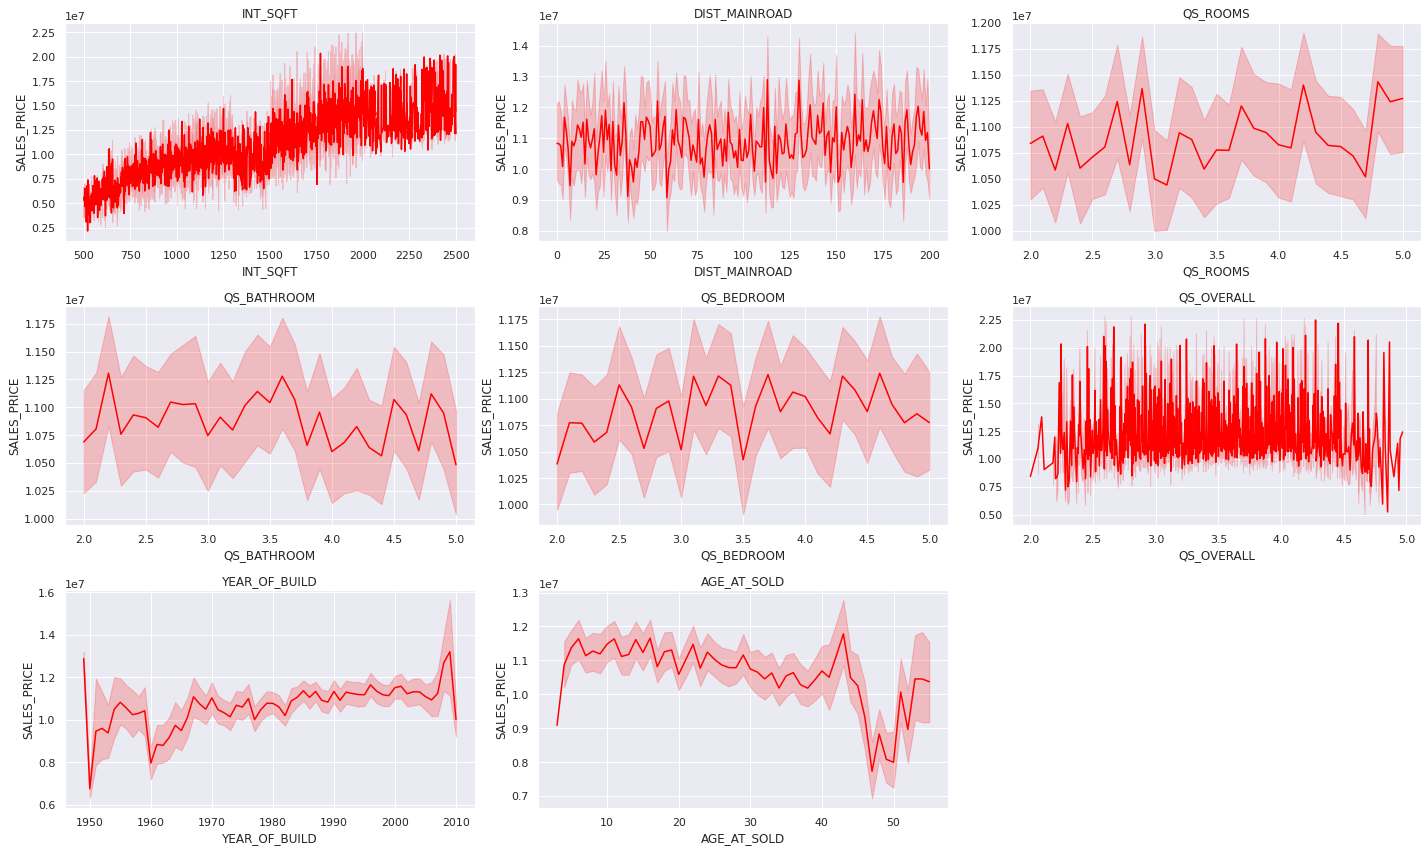

In [62]:
sns.set_theme(style="darkgrid",palette="winter")
plt.figure(figsize=(20, 12))
i = 330
for feature in quantitative_features:
  i += 1
  plt.subplot(i)
  sns.lineplot(df[feature],df['SALES_PRICE'], color="red")
  title1 = feature + "vs click_rate"
  plt.title(feature)
  
plt.tight_layout()
plt.show()

####**6.2.1 Square feet**

**Interpretation:**
                
1.   Above plot and correlation score shows a linear trend is present between SQFT and Sales price.


####**6.2.2 Distance of Mainroad**

**Interpretation:**
                
1.   Above plot and correlation score shows a there is no linear trend is present between Distance of mainroad and Sales price.

####**6.2.3 No.of Bedrooms**

**Interpretation:**
                
1.   Above plot and correlation score shows a there is linear trend is present between No. of bedrooms and Sales price.

####**6.2.4 No. of Bathrooms**

**Interpretation:**
                
1.   Above plot and correlation score shows a there is linear trend is present between No. of bathrooms and Sales price.

####**6.2.5 No. of rooms**

**Interpretation:**
                
1.   Above plot and correlation score shows a there is linear trend is present between No. of rooms and Sales price.

####**6.2.6 QS Room**

**Interpretation:**
                
1.   Above plot and correlation score shows a there is no linear trend is present between QS room and Sales price.

####**6.2.7 QS Bathroom**

**Interpretation:**
                
1.   Above plot and correlation score shows a there is no linear trend is present between QS bathroom and Sales price.

####**6.2.8 QS Bedroom**

**Interpretation:**
                
1.   Above plot and correlation score shows a there is no linear trend is present between QS bedroom and Sales price.

####**6.2.9 QS Overall**

**Interpretation:**
                
1.   Above plot and correlation score shows a there is no linear trend is present between QS overall and Sales price.

####**6.2.10 Age at Sold**

**Interpretation:**
                
1.   Above plot and correlation score shows a linear trend is present between Age at sold and Sales price.

##**7. Dropping Unwanted Features**-Features that does not make sense 

###**7.1 Dropping categorical features**

In [63]:
# Dropping a Categorical Features 
df=df.drop(["YEAR_OF_SALE","YEAR_OF_BUILD"],axis=1)

In [64]:
df.head(1)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_AT_SOLD
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.33,7600000,44


In [65]:
len(df.columns)

18

###**7.2 Dropping numerical features**

From above Regression plot, it is evident that **Features:'DIST_MAINROAD', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL'**
don't have relationship with Target Variable. Hence dropping the features.

In [66]:
df.drop(['DIST_MAINROAD', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL'], axis=1, inplace=True)

##**8. Encoding the categorical features**

In [67]:
# View of Datset before Label Encoding.
df.head(5)

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_AT_SOLD
0,Karapakkam,1004,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,7600000,44
1,Anna Nagar,1986,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,21717770,11
2,Adyar,909,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,13159200,20
3,Velachery,1855,3.0,2.0,5,Family,No,Others,No Sewer,Paved,I,9630290,22
4,Karapakkam,1226,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,7406250,30


In [68]:
encoder=LabelEncoder() 

In [69]:
# Label Encoding the Categorical Features.
df["AREA"]=df["AREA"].map({"Karapakkam":1,"Adyar":2,"Chrompet":3,"Velachery":4,"KK Nagar":5,"Anna Nagar":6,"T Nagar":7}).astype("int")
df["SALE_COND"]=df["SALE_COND"].map({"Partial":1,"Family":2,"AbNormal":3,"Normal Sale":4,"Adj Land":5}).astype("int")
df["PARK_FACIL"]=encoder.fit_transform(df["PARK_FACIL"])
df["UTILITY_AVAIL"]=df["UTILITY_AVAIL"].map({"ELO":1,"No Sewer":2,"AllPub":3}).astype("int")
df["STREET"]=df["STREET"].map({"No Access":1,"Paved":2,"Gravel":3}).astype("int")
df["MZZONE"]=df["MZZONE"].map({"A":1,"C":2,"I":3,"RH":4,"RL":5,"RM":6}).astype("int")

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7056 non-null   int64  
 1   INT_SQFT       7056 non-null   int64  
 2   N_BEDROOM      7056 non-null   float64
 3   N_BATHROOM     7056 non-null   float64
 4   N_ROOM         7056 non-null   int64  
 5   SALE_COND      7056 non-null   int64  
 6   PARK_FACIL     7056 non-null   int64  
 7   BUILDTYPE      7056 non-null   object 
 8   UTILITY_AVAIL  7056 non-null   int64  
 9   STREET         7056 non-null   int64  
 10  MZZONE         7056 non-null   int64  
 11  SALES_PRICE    7056 non-null   int64  
 12  AGE_AT_SOLD    7056 non-null   int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 1.0+ MB


N_BEDROOM, N_BATHROOM are discrete variable, but are in dtype: float. Let's convert the to Int

In [71]:
df["N_BEDROOM"] = df["N_BEDROOM"].astype("int")
df["N_BATHROOM"] = df["N_BATHROOM"].astype("int")

In [72]:
# View of Datset after Label Encoding.
df.head(5)

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_AT_SOLD
0,1,1004,1,1,3,3,1,Commercial,3,2,1,7600000,44
1,6,1986,2,1,5,3,0,Commercial,3,3,4,21717770,11
2,2,909,1,1,3,3,1,Commercial,1,3,5,13159200,20
3,4,1855,3,2,5,2,0,Others,2,2,3,9630290,22
4,1,1226,1,1,3,3,1,Others,3,3,2,7406250,30


**One Hot Encoding the Categorical Features.**
Since the class in feature: BUILDTYPE has Nominal Relationship, performing OneHotEncoding.


In [73]:
dummies=pd.get_dummies(df["BUILDTYPE"], drop_first=True)

In [74]:
dummies

,House,Others
0,0,0
1,0,0
2,0,0
3,0,1
4,0,1
...,...,...
7104,0,1
7105,0,1
7106,1,0
7107,0,0


In [75]:
df=pd.concat([df,dummies],axis="columns")

In [76]:
df=df.drop(["BUILDTYPE"],axis=1)

In [77]:
# View of Datset after Label and One-Hot Encoding.
df.head(5)

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_AT_SOLD,House,Others
0,1,1004,1,1,3,3,1,3,2,1,7600000,44,0,0
1,6,1986,2,1,5,3,0,3,3,4,21717770,11,0,0
2,2,909,1,1,3,3,1,1,3,5,13159200,20,0,0
3,4,1855,3,2,5,2,0,2,2,3,9630290,22,0,1
4,1,1226,1,1,3,3,1,3,3,2,7406250,30,0,1


In [78]:
df.shape

(7056, 14)

##**9. Correlation between features**

In [79]:
corr_features=df.corr()

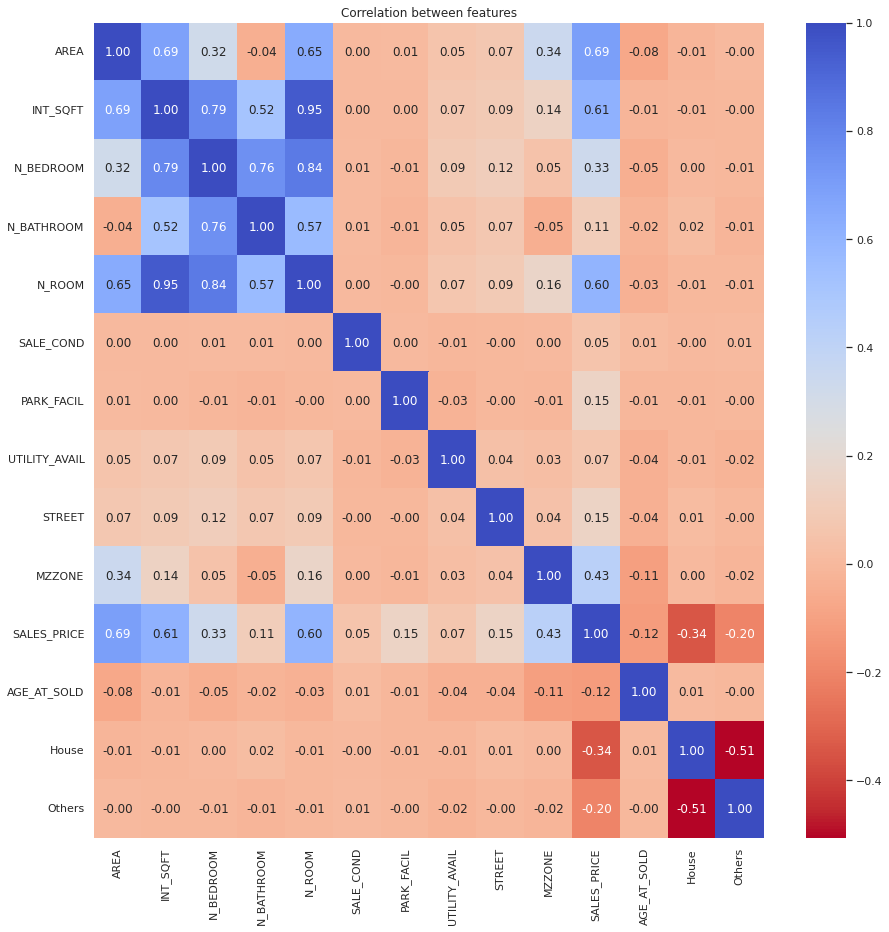

In [80]:
# Plotting Correlation between Features.
plt.figure(figsize=(15,15))
sns.heatmap(data=corr_features,fmt='.2f',cmap='coolwarm_r',annot=True) 
plt.title("Correlation between features")
plt.show()

##**10. Train-Test Split**

In [81]:
df.head(2)

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_AT_SOLD,House,Others
0,1,1004,1,1,3,3,1,3,2,1,7600000,44,0,0
1,6,1986,2,1,5,3,0,3,3,4,21717770,11,0,0


In [82]:
len(df.columns)

14

In [83]:
# Assigning Dependent and Independent Features.
X=df.drop(["SALES_PRICE"],axis=1) # 
y=df["SALES_PRICE"]

In [84]:
print(f"Independent features has {X.shape[0]} rows and {X.shape[1]} columns")
print(f"Dependent features has {y.shape[0]} rows and 1 columns")

Independent features has 7056 rows and 13 columns
Dependent features has 7056 rows and 1 columns


In [85]:
# Splitting the training and testing Dataset.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [86]:
print("The shape of X train:", X_train.shape)
print("The shape of X test:", X_test.shape)
print("The shape of y train:", y_train.shape)
print("The shape of y test:", y_test.shape)

The shape of X train: (5644, 13)
The shape of X test: (1412, 13)
The shape of y train: (5644,)
The shape of y test: (1412,)


##**11.Normalization**

In [87]:
# Scaling the Dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

##**12.Building Machine Learning Model**

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb


###**12.1 Linear regression**

In [89]:
linear_model=LinearRegression(fit_intercept=True)
linear_model.fit(X_train,y_train)

LinearRegression()

In [90]:
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=15).mean()
cross_val_linear_model

0.9235708057413313

###**12.2 K Nearest Neighbor Regression** 

####**12.2.1 Choosing the best K(neighbor) Value**

In [91]:
knn_values=np.arange(1,30)
cross_val_knn=[]
for k in knn_values:
  knn_regressor=KNeighborsRegressor(n_neighbors=k)
  knn_regressor.fit(X_train,y_train)
  print("K value : ", k, "cross_val_score : ", cross_val_score(knn_regressor,X_train,y_train,cv = 15).mean())
  cross_val_knn.append(cross_val_score(knn_regressor,X_train,y_train,cv = 15).mean())

K value :  1 cross_val_score :  0.9218584656554819
K value :  2 cross_val_score :  0.9416398591533468
K value :  3 cross_val_score :  0.9462016155525685
K value :  4 cross_val_score :  0.9473989239004066
K value :  5 cross_val_score :  0.9478203961437093
K value :  6 cross_val_score :  0.9470049651901301
K value :  7 cross_val_score :  0.9469040270448771
K value :  8 cross_val_score :  0.9452746580272657
K value :  9 cross_val_score :  0.9445520128462871
K value :  10 cross_val_score :  0.9433714534012902
K value :  11 cross_val_score :  0.9427619431522604
K value :  12 cross_val_score :  0.9413721179675156
K value :  13 cross_val_score :  0.9403559489783504
K value :  14 cross_val_score :  0.9391563067956168
K value :  15 cross_val_score :  0.9378313841373905
K value :  16 cross_val_score :  0.9366153721028195
K value :  17 cross_val_score :  0.9353977663077659
K value :  18 cross_val_score :  0.9341717290874787
K value :  19 cross_val_score :  0.9329003806521832
K value :  20 cross_v

In [92]:
print("The best K-Value is {} and Cross_val_score is: {}".format(np.argmax(cross_val_knn) + 1, max(cross_val_knn)))

The best K-Value is 5 and Cross_val_score is: 0.9478203961437093


####**12.2.2 Implementing K Nearest Neighbor Regression**

In [93]:
knn_regressor=KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train,y_train)


KNeighborsRegressor()

In [94]:
cross_val_knn_regressor=cross_val_score(knn_regressor,X_train,y_train,cv=15).mean()
cross_val_knn_regressor

0.9478203961437093

###**12.3 Decision Tree Regression**

####**12.3.1 Choosing the best of depth Value**

In [95]:
max_depth=np.arange(1,20)
cross_val_dt=[]
for d in max_depth:
  dt_regressor= DecisionTreeRegressor(max_depth=d, random_state=0)
  dt_regressor.fit(X_train,y_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(dt_regressor,X_train,y_train,cv = 15).mean())
  cross_val_dt.append(cross_val_score(dt_regressor,X_train,y_train,cv = 15).mean())



Depth :  1 cross_val_score :  0.36608004684076323
Depth :  2 cross_val_score :  0.5149815839278099
Depth :  3 cross_val_score :  0.6974000860865021
Depth :  4 cross_val_score :  0.8298993024092999
Depth :  5 cross_val_score :  0.8996896935394759
Depth :  6 cross_val_score :  0.9245222941702782
Depth :  7 cross_val_score :  0.9427785018191073
Depth :  8 cross_val_score :  0.9555908627500133
Depth :  9 cross_val_score :  0.9641543478620656
Depth :  10 cross_val_score :  0.9681842102996572
Depth :  11 cross_val_score :  0.9708450328214924
Depth :  12 cross_val_score :  0.9718478886976578
Depth :  13 cross_val_score :  0.9720485015466326
Depth :  14 cross_val_score :  0.9719389250938542
Depth :  15 cross_val_score :  0.971533254703319
Depth :  16 cross_val_score :  0.9716664203868514
Depth :  17 cross_val_score :  0.9718953134679551
Depth :  18 cross_val_score :  0.9718506446681747
Depth :  19 cross_val_score :  0.971935675319539


In [96]:
print("The best K-Value is {} and Cross_val_score is: {}".format(np.argmax(cross_val_dt) + 1, max(cross_val_dt)))

The best K-Value is 13 and Cross_val_score is: 0.9720485015466326


####**12.3.2 Implementing Decision Tree Regression**

In [97]:
dt_regressor=DecisionTreeRegressor(max_depth=13, random_state=0)
dt_regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=13, random_state=0)

In [98]:
cross_val_dt_regressor=cross_val_score(dt_regressor,X_train,y_train,cv=15).mean()
cross_val_dt_regressor

0.9720485015466326

###**12.4 Random Forest Regression**

####**12.4.1 Choosing the best depth value**

In [ ]:
max_depth=np.arange(1,20)
cross_val_rf=[]
for d in max_depth:
  rf_regressor=RandomForestRegressor(max_depth=d, random_state=0)
  rf_regressor.fit(X_train,y_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())
  cross_val_rf.append(cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())

Depth :  1 cross_val_score :  0.366061173603616
Depth :  2 cross_val_score :  0.5154276384209475
Depth :  3 cross_val_score :  0.6996993242844773
Depth :  4 cross_val_score :  0.8382915372398821
Depth :  5 cross_val_score :  0.911612571426184
Depth :  6 cross_val_score :  0.9400158888517436
Depth :  7 cross_val_score :  0.959762858906202


In [ ]:
cross_val_rf_regressor=max(cross_val_rf)

In [ ]:
print("The best K-Value is {} and Cross_val_score is: {}".format(np.argmax(cross_val_rf) + 1, max(cross_val_rf)))

####**12.4.2 Implementing Random Forest Regression**

In [ ]:
rf_regressor=RandomForestRegressor(max_depth=18, random_state=0)
rf_regressor.fit(X_train,y_train)


In [ ]:
cross_val_rf_regressor=cross_val_score(rf_regressor,X_train,y_train,cv=15).mean()
cross_val_rf_regressor

###**12.5 Gradient Boosting Regression**

####**12.5.1 Choosing the best Learning Rate** 

In [ ]:
cross_val_gb=[]
for lr in [0.01,0.05,0.1,0.2,0.3,0.35,0.4,0.5,0.8,1]:
  gb_regressor= GradientBoostingRegressor(learning_rate=lr)
  gb_regressor.fit(X_train, y_train)
  print("Learning rate : ", lr, "cross_val_score : ", cross_val_score(gb_regressor,X_train,y_train,cv = 15).mean())
  cross_val_gb.append(cross_val_score(gb_regressor,X_train,y_train,cv = 15).mean())

In [ ]:
print("The best K-Value is {} and Cross_val_score is: {}".format(np.argmax(cross_val_gb) + 1, max(cross_val_gb)))

####**12.5.2 Implementing Gradient Boosting Regression**

In [ ]:
gb_regressor= GradientBoostingRegressor(learning_rate=0.35)
gb_regressor.fit(X_train, y_train)

In [ ]:
cross_val_gb_regressor=cross_val_score(gb_regressor,X_train,y_train,cv=15).mean()
cross_val_gb_regressor

###**12.6 Extreme Gradient Boosting Regression**

####**12.6.1 Choosing the best Learning Rate** 

In [110]:
cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.09,0.1,0.11,0.12,0.13,0.15]:
  xgb_regressor= xgb.XGBRegressor(colsample_bytree=0.4,learning_rate = lr,n_estimators=1000) 
  xgb_regressor.fit(X_train,y_train) 
  cross_val_score1 = cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean()
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score1)
  cross_val_xgb.append(cross_val_score1)

[16:22:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:22:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:22:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:22:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:22:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:22:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:22:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:22:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [126]:
print("The best Learning-rate is 0.15 and Cross_val_score is: {}".format(max(cross_val_xgb)))

The best Learning-rate is 0.15 and Cross_val_score is: 0.998327844500393


####**12.6.2 Implementing Extreme Gradient Boosting Regression**

In [127]:
xgb_regressor= xgb.XGBRegressor(colsample_bytree=0.4,learning_rate =0.15,n_estimators=1000) # initialise the model
xgb_regressor.fit(X_train,y_train) #train the model


[16:42:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.4, learning_rate=0.15, n_estimators=1000)

In [128]:
cross_val_xgb_regressor=cross_val_score(xgb_regressor,X_train,y_train,cv=15).mean()
cross_val_xgb_regressor

[16:43:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

0.998327844500393

###**12.7 Cross-Validation Score for Machine-Learning Models**

In [129]:
print("Cross Validation Score for Linear Regression Model:",cross_val_linear_model)
print("Cross Validation Score for K-Nearest Neighbors Regression Model:",cross_val_knn_regressor)
print("Cross Validation Score for Decision Tree Regression Model: ",cross_val_dt_regressor)
print("Cross Validation Score for Random Forest Regression Model: ",cross_val_rf_regressor)
print("Cross Validation Score for Gradient Boosting Regression Model: ",cross_val_gb_regressor)
print("Cross Validation Score for Extreme-Gradient Boosting Regression Model: ",cross_val_xgb_regressor)

Cross Validation Score for Linear Regression Model: 0.9235708057413313
Cross Validation Score for K-Nearest Neighbors Regression Model: 0.9478203961437093
Cross Validation Score for Decision Tree Regression Model:  0.9720485015466326
Cross Validation Score for Random Forest Regression Model:  0.9889527027443097
Cross Validation Score for Gradient Boosting Regression Model:  0.993657564967767
Cross Validation Score for Extreme-Gradient Boosting Regression Model:  0.998327844500393


###**12.8 R2 Score for Machine-Learning Models**

In [130]:
y_pred_lr=linear_model.predict(X_test)
y_pred_knn=knn_regressor.predict(X_test)
y_pred_dt= dt_regressor.predict(X_test)
y_pred_rf=rf_regressor.predict(X_test)
y_pred_gb=gb_regressor.predict(X_test)
y_pred_xgb=xgb_regressor.predict(X_test)

In [131]:
R2_score_lr=r2_score(y_test,y_pred_lr)
R2_score_knn=r2_score(y_test,y_pred_knn)
R2_score_dt=r2_score(y_test,y_pred_dt)
R2_score_rf=r2_score(y_test,y_pred_rf)
R2_score_gb=r2_score(y_test,y_pred_gb)
R2_score_xgb=r2_score(y_test,y_pred_xgb)

In [132]:
print("R2 Score for Linear Regression Model:",R2_score_lr)
print("R2 Score for K-Nearest Neighbors Regression Model:",R2_score_knn)
print("R2 Score for Decision Tree Regression Model: ",R2_score_dt)
print("R2 Score for Random Forest Regression Model: ",R2_score_rf)
print("R2 Score for Gradient Boosting Regression Model: ",R2_score_gb)
print("R2 Score for Extreme-Gradient Boosting Regression Model: ",R2_score_xgb)

R2 Score for Linear Regression Model: 0.9205010351282763
R2 Score for K-Nearest Neighbors Regression Model: 0.9471005561872683
R2 Score for Decision Tree Regression Model:  0.9713874430549295
R2 Score for Random Forest Regression Model:  0.9888001554527069
R2 Score for Gradient Boosting Regression Model:  0.9931611373547997
R2 Score for Extreme-Gradient Boosting Regression Model:  0.9982849951644315


##**13. Suggestion to Sellers and buyers**-Solving problem statements based on Feature Importance

In [133]:
rf_regressor.feature_importances_

array([0.48711835, 0.10912292, 0.00205863, 0.00243387, 0.00266181,
       0.00311337, 0.01414426, 0.00124232, 0.01016029, 0.03891001,
       0.00546183, 0.12538238, 0.19818996])

In [134]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'SALES_PRICE',
       'AGE_AT_SOLD', 'House', 'Others'],
      dtype='object')

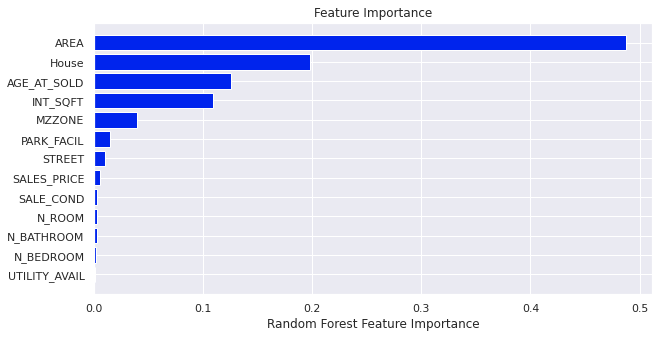

In [135]:
sorted_idx = rf_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], rf_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()

In [136]:
xgb_regressor.feature_importances_

array([0.29506627, 0.05027274, 0.03263276, 0.00390017, 0.07694705,
       0.00588249, 0.05242984, 0.0020301 , 0.01821479, 0.06350338,
       0.00396163, 0.23420618, 0.16095267], dtype=float32)

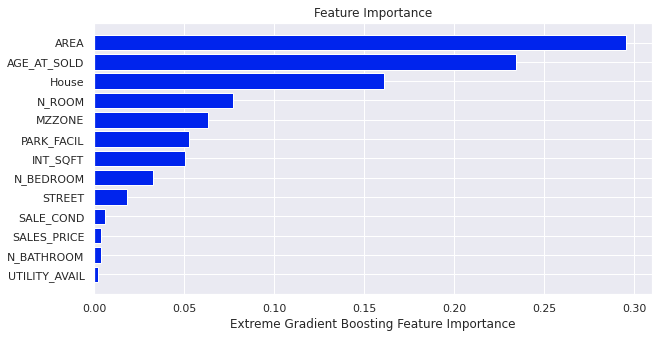

In [137]:

sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("Extreme Gradient Boosting Feature Importance")
plt.title("Feature Importance")
plt.show()

**Suggestion to Sellers**

Based on the **feature importance** given by Best Machine Learning
Algorithm(**Extreme Gradient Boosting**)-Sellers should Focus on the features of order given below to build homes that fetch more money:



1.   Age of the building,
2.   Area(location) of the building,
3.   No. of Rooms present,
4.   Build_type(Commercial,House etc..)-Commercial is best,
5.   MZ Zone,
6.   Parking Facility,
7.   No. of Bedrooms,
8.   Area(SQFT) of the building, 
9.   No. of Bathrooms,
10.  Street(Paved, Gravel, No access, etc.) of the building,
11.  Sales Condition,
12.  Utility available.

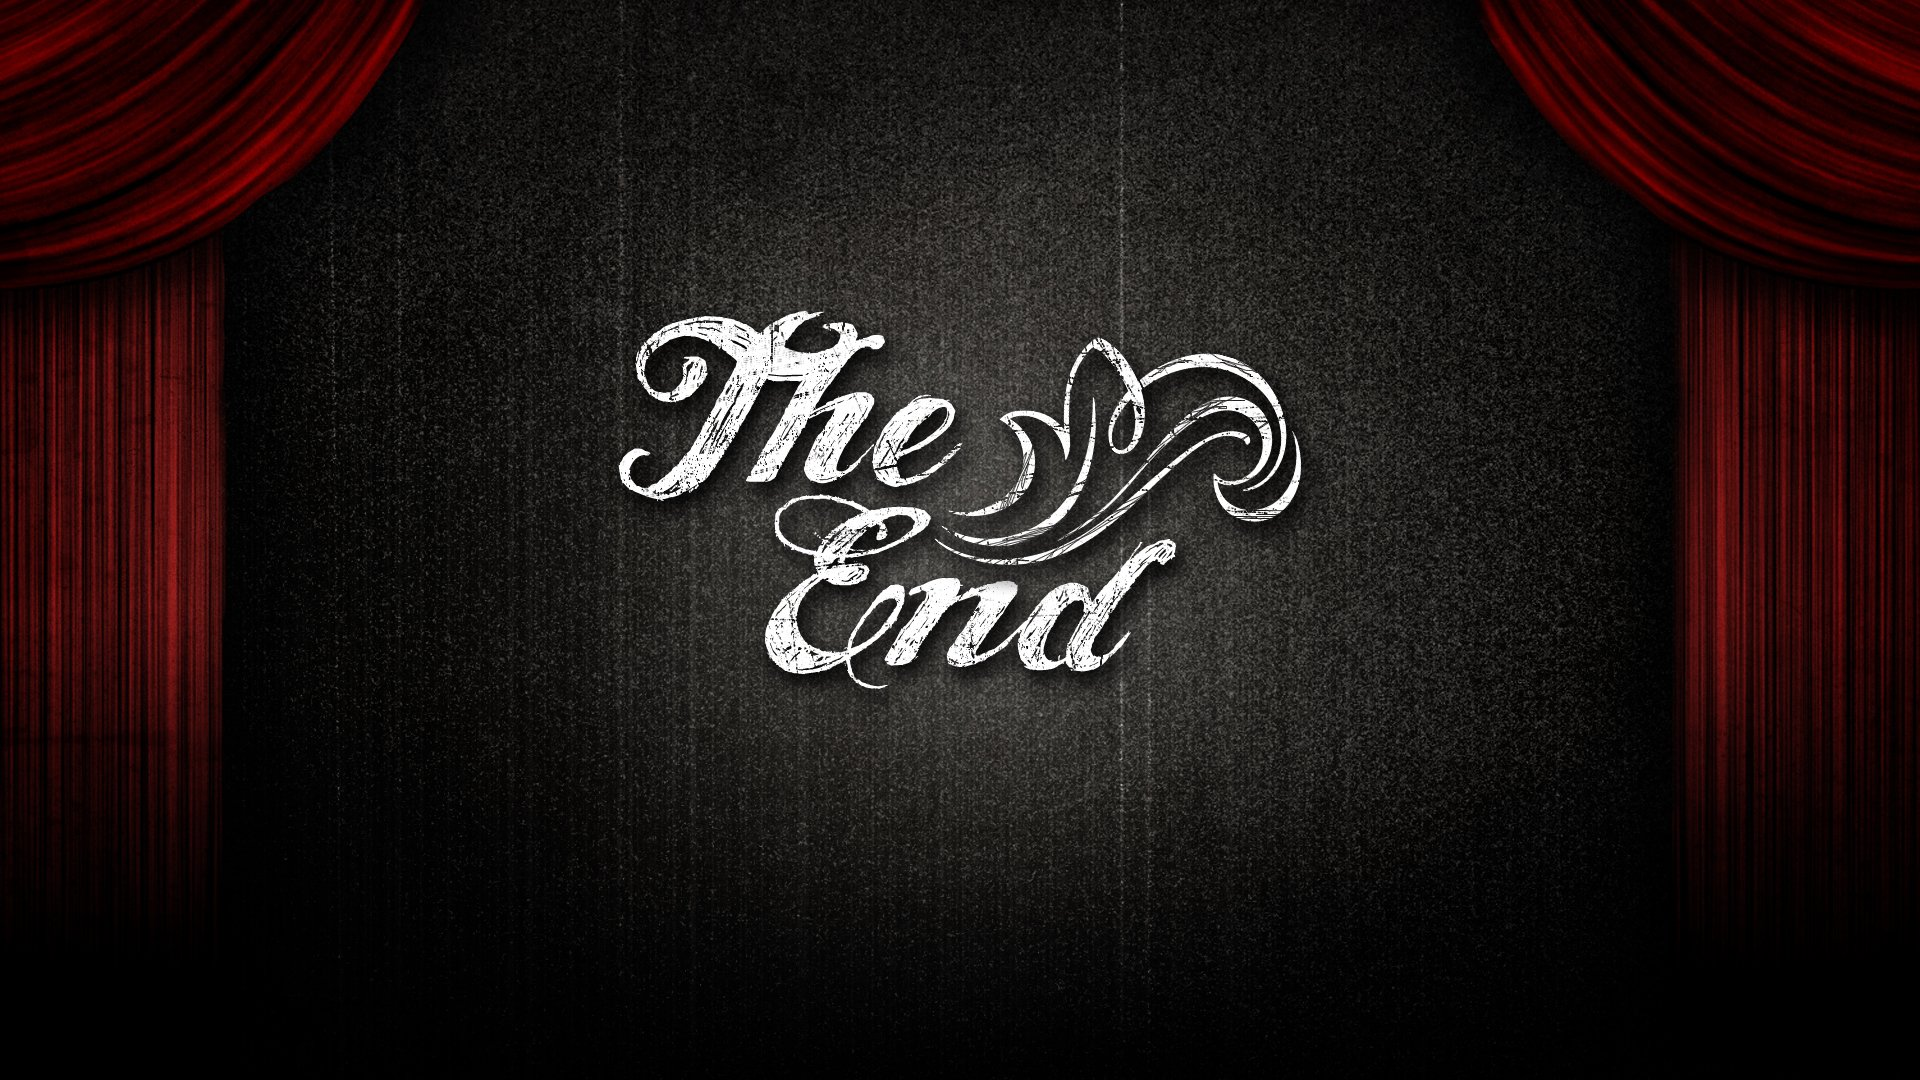